<a href="https://colab.research.google.com/github/molecular-mar/molecular-mar.github.io/blob/master/Taller_PyQComp_S3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Análisis y visualización de datos

## Manipulando datos de tablas con `pandas`

Antes de comenzar, cargemos de nuevo el archivo *data.zip* ([liga](https://molecular-mar.github.io/data.zip)). También debemos descomprimirlo:



In [ ]:
!unzip data.zip

Archive:  data.zip
  inflating: 03_Prod.mdout           
  inflating: benzene.xyz             
  inflating: buckminsterfullerene.xyz  
  inflating: distance_data_headers.csv  
  inflating: outfiles/butanol.out    
  inflating: outfiles/decanol.out    
  inflating: outfiles/ethanol.out    
  inflating: outfiles/heptanol.out   
  inflating: outfiles/hexanol.out    
  inflating: outfiles/methanol.out   
  inflating: outfiles/nonanol.out    
  inflating: outfiles/octanol.out    
  inflating: outfiles/pentanol.out   
  inflating: outfiles/propanol.out   
  inflating: sapt.out                
  inflating: water.xyz               


Es común que trabajemos con datos en formatos de tabla. Un formato de tabla común es el *comma separated values*, *.csv*. El archivo *distance_data_headers.csv* resulta de una simulación de 20 ns, con pasos de 2 fs, guardando la información de trayectoria cada 1000. Al final, contamos con 10,000 registros. Las trayectorias fueron generadas con AMBER, y finalmente las distancias y el archivo en cuestión fueron obtenidos con MDAnalysis.  

Importaremos de momento dos bibliotecas. La primera, `numpy`, contiene diversas herramientas para trabajar con arreglos como listas o matrices, incluyendo operaciones matemáticas especializadas (ej. para obtener valores y vectores propios).  

La segunda es `pandas`, que nos permite trabajar con tablas. Si bien podemos hacer esto solo con `numpy`, `pandas` puede resultar más intuitivo.




In [ ]:
import numpy as np # la instrucción as sirve para indicar un alias
import pandas as pd

La función `pd.read_csv(distance_data_headers.csv)` nos permite leer directamente archivos *csv*.

In [ ]:
tabla_distancias = pd.read_csv('distance_data_headers.csv')

In [ ]:
tabla_distancias

,Frame,THR4_ATP,THR4_ASP,TYR6_ATP,TYR6_ASP
0,1,8.9542,5.8024,11.5478,9.9557
1,2,8.6181,6.0942,13.9594,11.6945
2,3,9.0066,6.0637,13.0924,11.3043
3,4,9.2002,6.0227,14.5282,10.1763
4,5,9.1294,5.9365,13.5321,10.6279
...,...,...,...,...,...
9995,9996,8.5083,7.7587,9.1789,10.6715
9996,9997,8.9524,7.4681,9.5132,10.9945
9997,9998,8.6625,7.7306,9.5469,10.3063
9998,9999,9.2456,7.8886,9.8151,10.7564


In [ ]:
# Para observar los tipos de nuestras columnas
tabla_distancias.dtypes

Frame         int64
THR4_ATP    float64
THR4_ASP    float64
TYR6_ATP    float64
TYR6_ASP    float64
dtype: object

Algunas formas de acceder a los datos de la tabla:

In [ ]:
# Seleccionar una columna
tabla_distancias['THR4_ATP']

0       8.9542
1       8.6181
2       9.0066
3       9.2002
4       9.1294
         ...  
9995    8.5083
9996    8.9524
9997    8.6625
9998    9.2456
9999    8.8135
Name: THR4_ATP, Length: 10000, dtype: float64

In [ ]:
# Seleccionar una fila (por indice)
tabla_distancias.loc[0]

Frame        1.0000
THR4_ATP     8.9542
THR4_ASP     5.8024
TYR6_ATP    11.5478
TYR6_ASP     9.9557
Name: 0, dtype: float64

In [ ]:
# Seleccionar una fila (por posicion)
tabla_distancias.iloc[0]

Frame        1.0000
THR4_ATP     8.9542
THR4_ASP     5.8024
TYR6_ATP    11.5478
TYR6_ASP     9.9557
Name: 0, dtype: float64

In [ ]:
# Seleccionar una fila (por posicion)
tabla_distancias.iloc[0]

In [ ]:
# Un elemento de una columna
tabla_distancias['THR4_ATP'][0]

8.9542

In [ ]:
# Un fragmento de tabla
tabla_distancias[['THR4_ATP','TYR6_ASP']][0:4]

,THR4_ATP,TYR6_ASP
0,8.9542,9.9557
1,8.6181,11.6945
2,9.0066,11.3043
3,9.2002,10.1763


In [ ]:
# Primeras o últimas lineas
print(tabla_distancias.head()) # Primeras
print(tabla_distancias.tail()) # Últimas

   Frame  THR4_ATP  THR4_ASP  TYR6_ATP  TYR6_ASP
0      1    8.9542    5.8024   11.5478    9.9557
1      2    8.6181    6.0942   13.9594   11.6945
2      3    9.0066    6.0637   13.0924   11.3043
3      4    9.2002    6.0227   14.5282   10.1763
4      5    9.1294    5.9365   13.5321   10.6279
      Frame  THR4_ATP  THR4_ASP  TYR6_ATP  TYR6_ASP
9995   9996    8.5083    7.7587    9.1789   10.6715
9996   9997    8.9524    7.4681    9.5132   10.9945
9997   9998    8.6625    7.7306    9.5469   10.3063
9998   9999    9.2456    7.8886    9.8151   10.7564
9999  10000    8.8135    7.9170    9.9517   10.7848


Podemos hacer ciertos análisis estadísticos:

In [ ]:
# Podemos calcular el promedio
tabla_distancias.mean()

Frame       5000.500000
THR4_ATP      10.876951
THR4_ASP       7.342345
TYR6_ATP      11.209791
TYR6_ASP      10.993443
dtype: float64

In [ ]:
# Para una descripcion completa
tabla_distancias.describe()

,Frame,THR4_ATP,THR4_ASP,TYR6_ATP,TYR6_ASP
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5000.50000,10.876951,7.342345,11.209791,10.993443
std,2886.89568,2.676669,0.995629,2.367468,1.058657
min,1.00000,5.741600,3.606100,5.707900,7.855700
25%,2500.75000,8.740850,6.739650,9.560125,10.299925
50%,5000.50000,10.775950,7.410700,10.894250,10.880550
75%,7500.25000,12.892300,7.976450,12.921500,11.574075
max,10000.00000,19.480000,10.816900,18.932300,15.006500


In [ ]:
# len solo nos regresa el numero de filas
len(tabla_distancias)

10000

In [ ]:
print(tabla_distancias.size)# Numero total de elementos
print(tabla_distancias.shape)# Dimensiones de la tabla

50000
(10000, 5)


In [ ]:
# Hay otras operaciones posibles.
tabla_distancias['TYR6_ATP'].sum()

112097.91329999999

In [ ]:
# Escalemos las distancias:
tabla_distancias['THR4_ASP'] * 0.5

0       2.90120
1       3.04710
2       3.03185
3       3.01135
4       2.96825
         ...   
9995    3.87935
9996    3.73405
9997    3.86530
9998    3.94430
9999    3.95850
Name: THR4_ASP, Length: 10000, dtype: float64

## Graficas con matplotlib

Con los datos de nuestra tabla, o con datos de listas, podemos realizar gráficas. Para ello, importemos `matplotlib`:

In [ ]:
import matplotlib.pyplot as plt

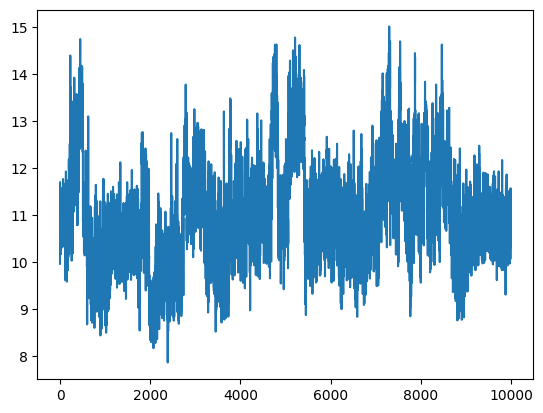

In [ ]:
plt.plot(tabla_distancias['TYR6_ASP'])

Podemos añadir diversas características a nuestra gráfica:

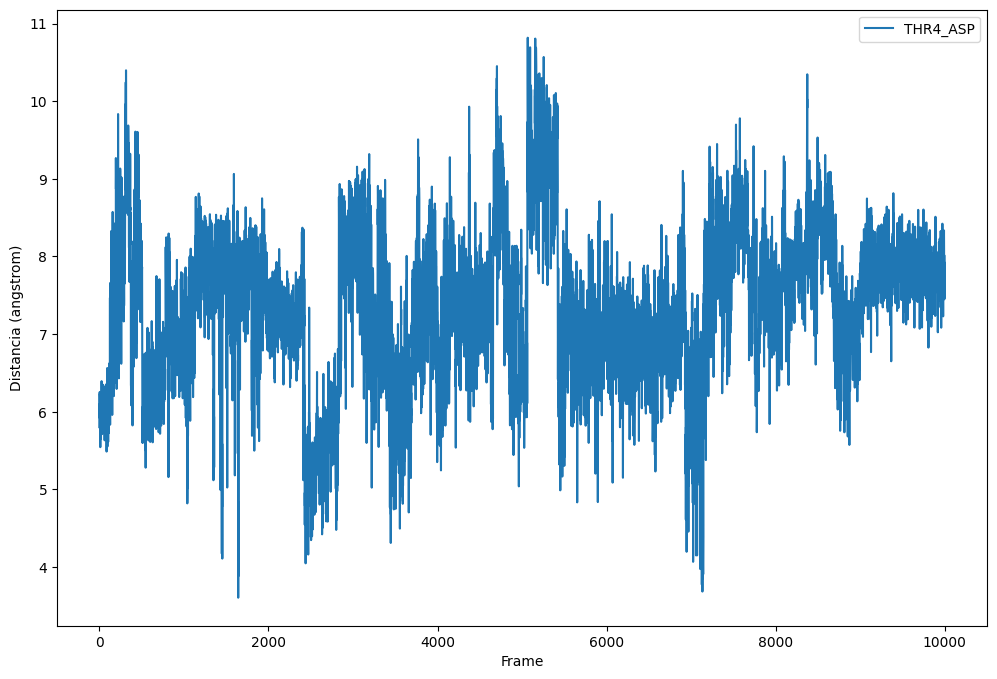

In [ ]:
etiqueta = tabla_distancias['THR4_ASP'].name # Nombre de la columna
plt.figure(figsize=(12,8)) # Definimos las dimensiones del gráfico (en pulgadas)
plt.xlabel('Frame') # Titulo eje x
plt.ylabel('Distancia (angstrom)') # Titulo eje y
# Nota el efecto de label
fig_1 = plt.plot(tabla_distancias['THR4_ASP'], label=etiqueta)
plt.legend() # Para incluir el recuadro de leyendas

plt.savefig(f'{etiqueta}.png', dpi=300) # Para guardar el grafico. dpi para aumentar calidad

Grafiquemos mas de una columna:

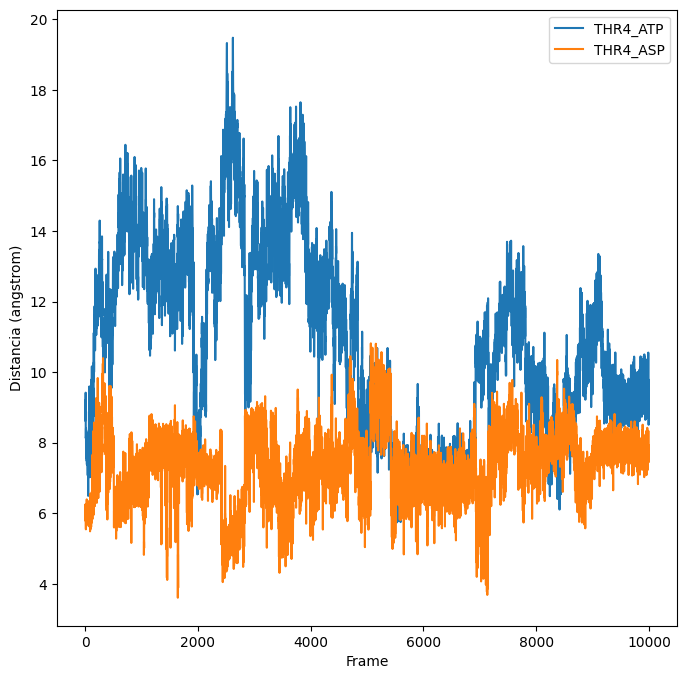

In [ ]:
etiquetas = tabla_distancias.columns # Nombres de la columnas
plt.figure(figsize=(8,8))
plt.xlabel('Frame')
plt.ylabel('Distancia (angstrom)')
plt.plot(tabla_distancias['THR4_ATP'], label=etiquetas[1])
plt.plot(tabla_distancias['THR4_ASP'], label=etiquetas[2])
plt.legend()

La gráfica con todos los valores y la gráfica cada 100 pasos:

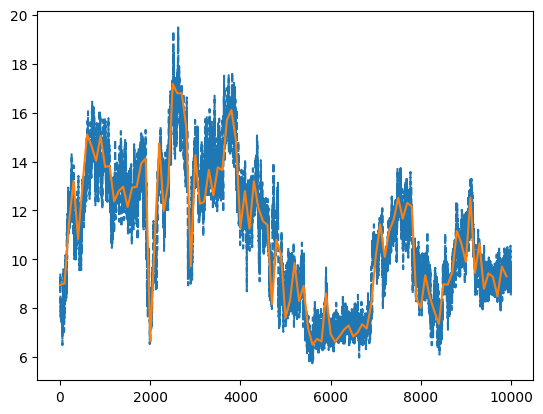

In [ ]:
# Varios detalles a notas:
# Usamos iloc para usar notación de indices en lugar del nombre de columna
# '--' para usar una linea recortada en la gráfica
# En las rebanadas, podemos incluir un tercer valor para indicar el tamaño
# del paso.
plt.plot(tabla_distancias.iloc[:,0], tabla_distancias.iloc[:,1],'--')
plt.plot(tabla_distancias.iloc[0::100,0], tabla_distancias.iloc[0::100,1])

Gráficos múltiples:

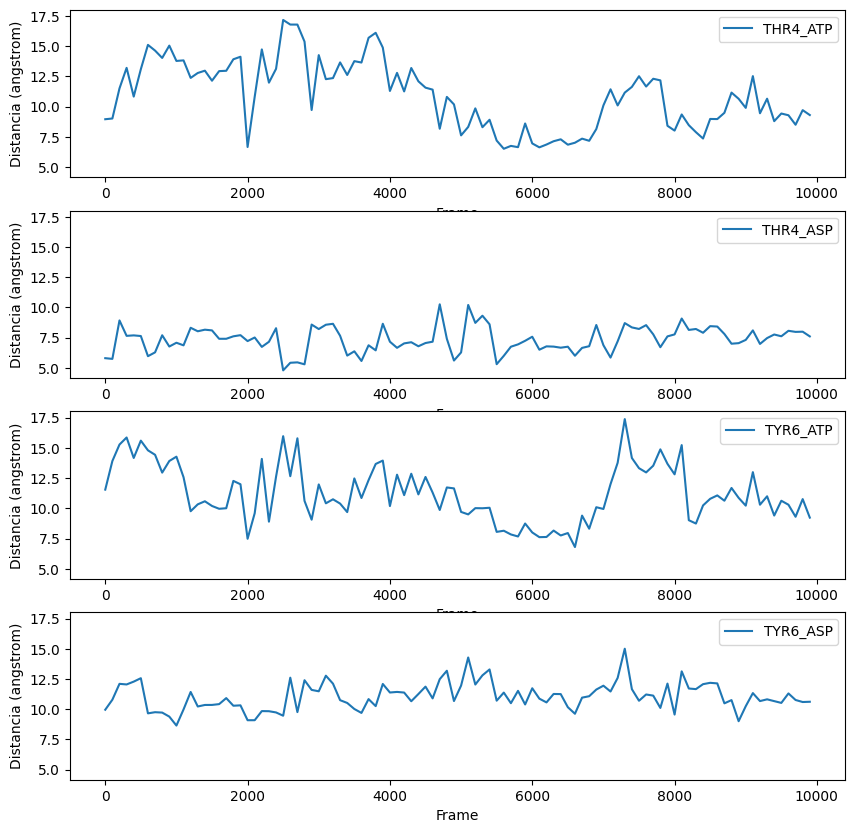

In [ ]:
headers = tabla_distancias.columns
#Con la siguiente linea definimos cuántos subgráficos tendremos
fig, ax = plt.subplots(len(headers)-1, 1, figsize=(10, 10), sharey=True)

for col in range(1, len(headers)):
    sample = headers[col]

    ax[col-1].plot(tabla_distancias.iloc[0::100,0], tabla_distancias.iloc[0::100,col], label=sample)
    ax[col-1].set_xlabel('Frame')
    ax[col-1].set_ylabel('Distancia (angstrom)')
    ax[col-1].legend()


# Visualizando estructuras con py3Dmol

Hay algunas bibliotecas que nos permiten visualizar nuestros sistemas, similar a Jmol o VMD. Aquí veremos la opción de py3Dmol, que es una implementación de la biblioteca 3Dmol de Javascript.

Para comenzar, es necesario que instalemos esta biblioteca: el resto de bibliotecas que hemos usado están disponibles por default en Colab.

Para instalar una biblioteca:

```python
!pip install biblioteca
```

In [ ]:
# Intenta cargar la biblioteca sin instalarla
import py3Dmol

ModuleNotFoundError: ignored

In [ ]:
!pip install py3Dmol

In [ ]:
import py3Dmol

Vamos a cargar el archivo *buckminsterfullerene.xyz*. Puedes cambiar solo la ruta para ver otra molécula.

In [ ]:
# Ruta al archivo
archivo_xyz = '/content/buckminsterfullerene.xyz'
with open(archivo_xyz) as in_file:
    molecula = "".join([x for x in in_file])

In [ ]:
# Creamos una vista
view = py3Dmol.view(width=400, height=300)
# Agregamos nuestro sistema. Podemos especificar el formato.
view.addModel(molecula,'xyz')
# Añadimos información sobre el estilo
view.setStyle({"stick":{}})
view.setBackgroundColor('0xeeeeee')
view.zoomTo()
view.show()

You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

Otros formatos que puede interpretar son *.pdb* y *.mol*. También es posible consultar directamente las bases de datos PDB y PubChem, usando:



```
query=’pdb:pdb-id‘

query=’cid:pubchem-id‘
```



In [ ]:
p = py3Dmol.view(query='mmtf:1ycr')
p.setStyle({'cartoon': {'color':'spectrum'}})
p

You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol